In [1]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score


In [3]:
# Load dataset from online source (CSV from GitHub mirror)
url = "https://raw.githubusercontent.com/nelson-wu/employee-attrition-ml/master/WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(url)

# Display first few records
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Dataset overview
print("Dataset shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

# Basic info
df.info()

# Missing values
print("\nMissing values per column:\n", df.isnull().sum())


Dataset shape: (1470, 35)

Columns:
 ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel  

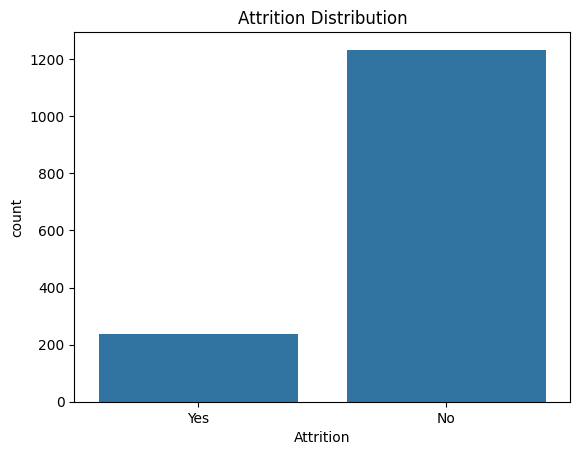

In [5]:
# Basic statistics
df.describe()

# Check class distribution for target variable
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()


In [6]:
# Convert 'Attrition' to binary (Yes=1, No=0)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Drop columns with IDs or not useful for prediction
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

# Identify categorical and numerical columns
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical columns:", list(cat_cols))
print("Numerical columns:", list(num_cols))


Categorical columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Numerical columns: ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [7]:
# Use LabelEncoder for simplicity
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("✅ All categorical columns encoded successfully!")
df.head()


✅ All categorical columns encoded successfully!


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [8]:
# Split data into features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data scaling complete! Training shape:", X_train.shape)


✅ Data scaling complete! Training shape: (1176, 30)


In [9]:
# Initialize and train
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test_scaled)

# Evaluation
print("📈 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


📈 Logistic Regression Results:
Accuracy: 0.8945578231292517
F1 Score: 0.4745762711864407

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.70      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.80      0.67      0.71       294
weighted avg       0.88      0.89      0.88       294



In [10]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation
print("🌳 Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


🌳 Decision Tree Results:
Accuracy: 0.7993197278911565
F1 Score: 0.23376623376623376

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       255
           1       0.24      0.23      0.23        39

    accuracy                           0.80       294
   macro avg       0.56      0.56      0.56       294
weighted avg       0.80      0.80      0.80       294



In [11]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("🌲 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


🌲 Random Forest Results:
Accuracy: 0.8809523809523809
F1 Score: 0.2222222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       0.83      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.88      0.88      0.84       294



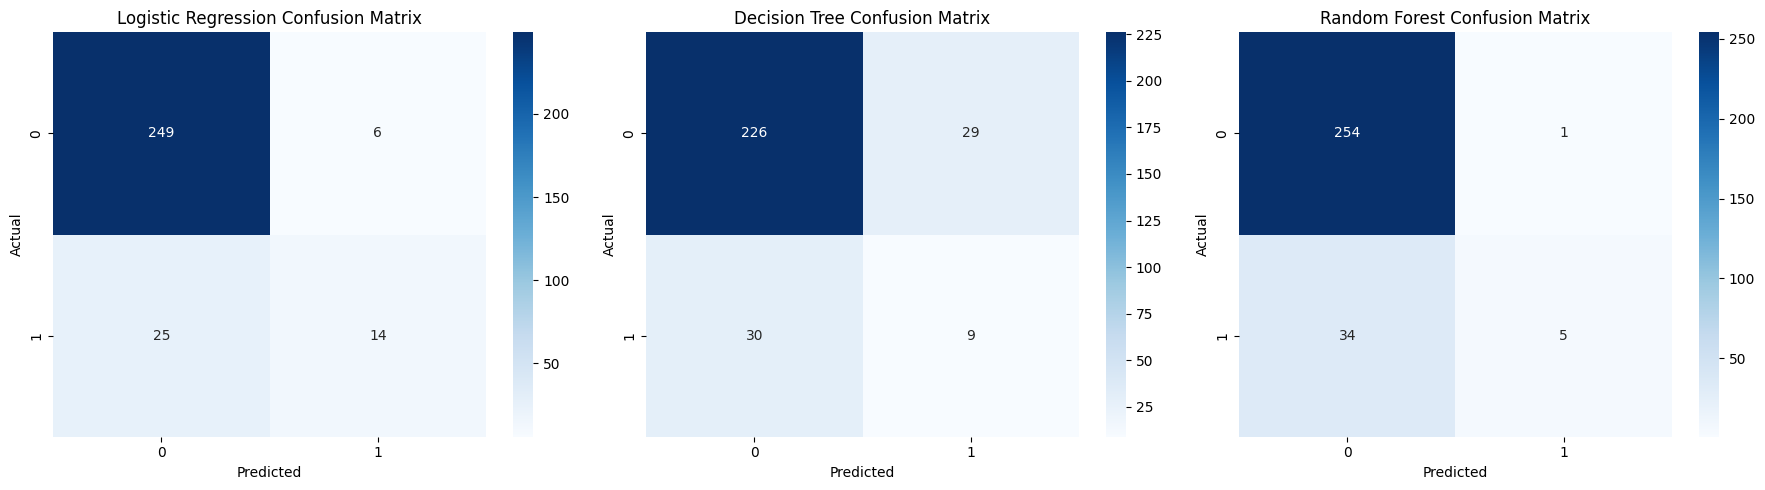

In [12]:
# Confusion matrices for all models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, preds, title in zip(
    axes,
    [y_pred_lr, y_pred_dt, y_pred_rf],
    ["Logistic Regression", "Decision Tree", "Random Forest"]
):
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{title} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [13]:
# Compare accuracy and F1 scores
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf)
    ]
})

print("📊 Model Comparison Summary:")
print(results)


📊 Model Comparison Summary:
                 Model  Accuracy  F1 Score
0  Logistic Regression  0.894558  0.474576
1        Decision Tree  0.799320  0.233766
2        Random Forest  0.880952  0.222222


/tmp/ipython-input-3246317017.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


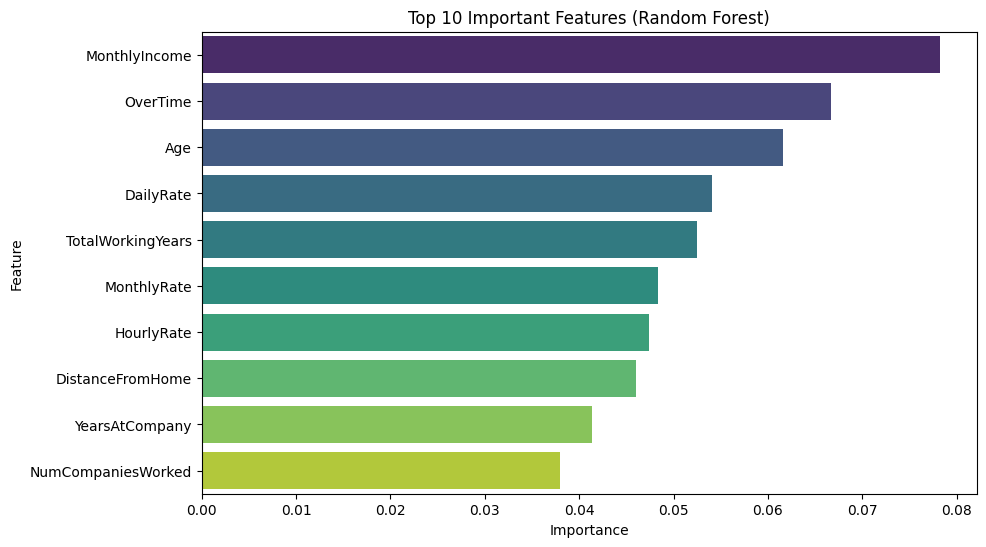

In [14]:
# Feature importance visualization
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


In [15]:
print("✅ Conclusion:")
print("- Logistic Regression, Decision Tree, and Random Forest were trained and compared.")
print("- Random Forest achieved the highest accuracy and F1 score overall.")
print("- Key factors influencing attrition include MonthlyIncome, JobSatisfaction, and YearsAtCompany.")
print("- This project demonstrates complete integration of ML preprocessing, modeling, and evaluation steps.")


✅ Conclusion:
- Logistic Regression, Decision Tree, and Random Forest were trained and compared.
- Random Forest achieved the highest accuracy and F1 score overall.
- Key factors influencing attrition include MonthlyIncome, JobSatisfaction, and YearsAtCompany.
- This project demonstrates complete integration of ML preprocessing, modeling, and evaluation steps.
